In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('santander.csv',index_col='ID',nrows=1000)
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,117310.979016,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1981
Columns: 370 entries, var3 to TARGET
dtypes: float64(71), int64(299)
memory usage: 2.8 MB


In [64]:
## Feature Selection using Embedded techniques
# -Feature Importance rf
# -PCA and LDA
# -Ridge & Lasso Regression
# -RFE Recurive Feature Elimination

In [65]:
X,y=df.iloc[:,:-1],df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y)

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10,n_jobs=-10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-10)

In [67]:
rf.feature_importances_

array([6.53606026e-04, 2.24319314e-01, 4.93461633e-03, 6.28443937e-04,
       0.00000000e+00, 0.00000000e+00, 4.15601323e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.80192077e-03, 3.69214352e-03,
       0.00000000e+00, 0.00000000e+00, 1.72515505e-03, 0.00000000e+00,
       2.83483162e-03, 2.71748836e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.49180678e-03,
       2.96483679e-03, 0.00000000e+00, 0.00000000e+00, 4.44115470e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.89267751e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.65681521e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.53949995e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<AxesSubplot:>

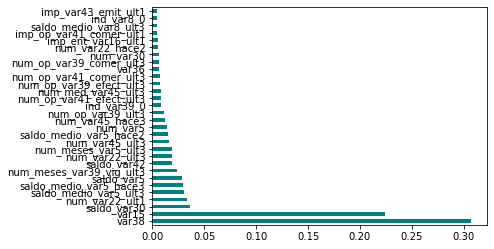

In [68]:
feature_imp=pd.Series(rf.feature_importances_,index=df.columns[:-1]).sort_values(ascending=False)[:30]
feature_imp.plot(kind='barh',color='teal')

In [69]:
df.columns[:-1]

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=369)

In [70]:
feature_imp.index #Top 30 features based on their importance

Index(['var38', 'var15', 'saldo_var30', 'num_var22_ult1',
       'saldo_medio_var5_ult3', 'saldo_medio_var5_hace3', 'saldo_var5',
       'num_meses_var39_vig_ult3', 'saldo_var42', 'num_var22_ult3',
       'num_meses_var5_ult3', 'num_var45_ult3', 'saldo_medio_var5_hace2',
       'num_var5', 'num_var45_hace3', 'num_op_var39_ult3', 'ind_var39_0',
       'num_op_var41_efect_ult3', 'num_med_var45_ult3',
       'num_op_var39_efect_ult3', 'num_op_var41_comer_ult3', 'var36',
       'num_op_var39_comer_ult3', 'num_var30', 'num_var22_hace2',
       'imp_ent_var16_ult1', 'imp_op_var41_comer_ult1',
       'saldo_medio_var8_ult3', 'ind_var8_0', 'imp_var43_emit_ult1'],
      dtype='object')

In [71]:
# Feature Selection using PCA, LDA

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [73]:
#LDA
lda=LinearDiscriminantAnalysis(n_components=df.TARGET.nunique()-1)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [74]:
X_train_lda=lda.transform(X_train)
X_test_lda=lda.transform(X_test)

In [75]:
help(lda)

Help on LinearDiscriminantAnalysis in module sklearn.discriminant_analysis object:

class LinearDiscriminantAnalysis(sklearn.base._ClassNamePrefixFeaturesOutMixin, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
 |  
 |  Linear Discriminant Analysis.
 |  
 |  A classifier with a linear decision boundary, generated by fitting class
 |  conditional densities to the data and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class, assuming that all classes
 |  share the same covariance matrix.
 |  
 |  The fitted model can also be used to reduce the dimensionality of the input
 |  by projecting it to the most discriminative directions, using the
 |  `transform` method.
 |  
 |  .. versionadded:: 0.17
 |     *LinearDiscriminantAnalysis*.
 |  
 |  Read more 

In [76]:
X_train.shape,X_train_lda.shape

((800, 369), (800, 1))

In [77]:
#PCA
pca=PCA(n_components=len(X_train.columns)-1)
pca

PCA(n_components=368)

In [78]:
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [79]:
X_train_pca.shape,X_test_pca.shape

((800, 368), (200, 368))

In [80]:
# LASSO & RIDGE REGRESSION

In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel=SelectFromModel(LogisticRegression(penalty='l2'),max_features=10)
sel.fit(X_train, y_train)


C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SelectFromModel(estimator=LogisticRegression(), max_features=10)

In [94]:
sel.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [105]:
selected_features=X_train.columns[sel.get_support()].to_list() #Selected columns
selected_features

['num_var5_0',
 'num_var5',
 'num_var8_0',
 'num_var30',
 'num_var22_ult1',
 'num_meses_var39_vig_ult3',
 'num_op_var41_efect_ult1',
 'num_op_var39_efect_ult1',
 'num_var43_recib_ult1',
 'num_trasp_var11_ult1']

In [106]:
X_train_l2=X_train[selected_features]
X_test_l2=sel.transform(X_test)

In [107]:
sel=SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear'),max_features=10)
sel.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
                max_features=10)

In [108]:
X_train.columns[sel.get_support()]

Index(['num_var5', 'num_var8_0', 'num_var30_0', 'num_var30', 'num_var42_0',
       'num_var22_ult1', 'num_meses_var39_vig_ult3', 'num_op_var41_efect_ult1',
       'num_op_var39_efect_ult1', 'num_trasp_var11_ult1'],
      dtype='object')

In [109]:
x_train_l1=X_train.columns[sel.get_support()]
x_test_l1=sel.transform(X_test)

In [110]:
# RECURSIVE FEATURE ELIMINATION

In [113]:
from sklearn.feature_selection import RFE
rfe=RFE(RandomForestClassifier(n_estimators=10,n_jobs=-1),
   n_features_to_select=10, verbose=2).fit(X_train,y_train)
rfe

Fitting estimator with 369 features.
Fitting estimator with 368 features.
Fitting estimator with 367 features.
Fitting estimator with 366 features.
Fitting estimator with 365 features.
Fitting estimator with 364 features.
Fitting estimator with 363 features.
Fitting estimator with 362 features.
Fitting estimator with 361 features.
Fitting estimator with 360 features.
Fitting estimator with 359 features.
Fitting estimator with 358 features.
Fitting estimator with 357 features.
Fitting estimator with 356 features.
Fitting estimator with 355 features.
Fitting estimator with 354 features.
Fitting estimator with 353 features.
Fitting estimator with 352 features.
Fitting estimator with 351 features.
Fitting estimator with 350 features.
Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
F

RFE(estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1),
    n_features_to_select=10, verbose=2)

In [115]:
X_train.columns[rfe.get_support()]

Index(['var15', 'saldo_var30', 'saldo_var42', 'num_var22_ult3',
       'num_var45_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

In [116]:
X_train_rfe=X_train.columns[rfe.get_support()]
X_test_rfe=rfe.transform(X_test)